
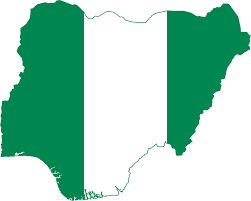 

# <font color = green />  MODELLING THE NIGERIA HOUSING PROJECT:


#### <font color = brown, italic = true />  by_WQU Alumni whatsapp/telegram group

### DESCRIPTION OF THE PROJECT :

The purpose of this project is to predict the house price in Nigeria based on the following attribures:
- price = The price of the building when its not in the estate

- Bedrooms = Number of bedrooms

- Bathrooms = Numberer of bathrooms

- Toilet = Number of Toilet

- Estate_flag = is the building in an estate or not

- Terrace_flag = class of its architecture

- New_flag = degree of newness

- Serviced_flag = Do the locality has any service like security or cleaner

- Estate_price = Price of the building in the estate

- Serviced_price = Price of the estate with serviced_flag (Definitely in the estate)

- Location_rank = rank of the estate with location

- New_price = price of its new counterpart

- Exec_flag = level of how executive it is.

- Locationbed = sub_location

- Location = location

- Spec_location = full location address

- Description = description


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Housing_data.csv")

In [3]:
df.head()

,price,bedrooms,bathrooms,toilets,estate_flag,terrace_flag,new_flag,serviced_flag,estate_price,serviced_price,location_rank,new_price,exec_flag,locationbed,location,spec_location,description
0,850000.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,1300000.0,1840000.0,31.0,1840000.0,1.0,gbagada3,gbagada,sosanya soluyi gbagada lagos,3 bedroom Flat / Apartment for rent Sosanya So...
1,650000.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,400000.0,560000.0,9.0,560000.0,1.0,gbagada1,gbagada,millenuim ups gbagada lagos,1 bedroom mini flat Mini flat Flat / Apartment...
2,600000.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,800000.0,1060000.0,26.0,1060000.0,1.0,gbagada2,gbagada,alapere gbagada lagos,"2bed at Alapere, all rooms ensuit ... ..."
3,1500000.0,3.0,3.0,4.0,1.0,0.0,0.0,0.0,1300000.0,1840000.0,31.0,1840000.0,2.0,gbagada3,gbagada,medina gbagada lagos,3 bedroom Flat / Apartment for rent Medina Gba...
4,1500000.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,1300000.0,1840000.0,31.0,1840000.0,2.0,gbagada3,gbagada,adeola atunrase medina gbagada lagos,3 bedroom House for rent Adeola Atunrase Medin...


In [4]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'toilets', 'estate_flag',
       'terrace_flag', 'new_flag', 'serviced_flag', 'estate_price',
       'serviced_price', 'location_rank', 'new_price', 'exec_flag',
       'locationbed', 'location', 'spec_location', 'description'],
      dtype='object')

In [5]:
df.nunique()

price              130
bedrooms             5
bathrooms            7
toilets              8
estate_flag          2
terrace_flag         2
new_flag             2
serviced_flag        2
estate_price        33
serviced_price      40
location_rank       34
new_price           40
exec_flag            4
locationbed         47
location            10
spec_location     1965
description       3994
dtype: int64

Based on the above all are integers: The following columns are boolean based on the output are only 2 variable estate flag, terrace flag, new flag and serviced flag.


In [14]:
df.describe()

,price,bedrooms,bathrooms,toilets,estate_flag,terrace_flag,new_flag,serviced_flag,estate_price,serviced_price,location_rank,new_price,exec_flag
count,4.377000e+03,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,4.377000e+03,4.377000e+03,4377.000000,4.377000e+03,4377.000000
mean,2.204272e+06,2.714645,2.500114,2.980809,0.588302,0.303404,0.534384,0.405529,2.150993e+06,2.898988e+06,35.064428,2.898988e+06,2.110578
std,1.788746e+06,1.164742,1.437791,1.710703,0.492197,0.459781,0.498873,0.491050,1.575584e+06,2.022732e+06,15.869352,2.022732e+06,1.126229
min,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000e+05,1.500000e+05,2.000000,1.500000e+05,1.000000
25%,8.000000e+05,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+05,1.060000e+06,25.000000,1.060000e+06,1.000000
50%,1.800000e+06,3.000000,3.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.800000e+06,2.500000e+06,35.000000,2.500000e+06,2.000000
75%,3.000000e+06,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.500000e+06,4.500000e+06,52.000000,4.500000e+06,3.000000
max,8.000000e+06,5.000000,6.000000,7.000000,1.000000,1.000000,1.000000,1.000000,8.000000e+06,8.000000e+06,67.000000,8.000000e+06,4.000000


In [35]:
df[['serviced_price','new_price']].describe()

,serviced_price,new_price
count,4.377000e+03,4.377000e+03
mean,2.898988e+06,2.898988e+06
std,2.022732e+06,2.022732e+06
min,1.500000e+05,1.500000e+05
25%,1.060000e+06,1.060000e+06
50%,2.500000e+06,2.500000e+06
75%,4.500000e+06,4.500000e+06
max,8.000000e+06,8.000000e+06


Based on the above the following some columns are the same as their mean, std , count, quartiles are the same.
So in this sense we need to drop so that we less information that we can be able to process faster and efficient.
- new price and serviced price.

In [26]:
# create a unique indentify for all the columns
df['No']=df.index + 1

In [42]:
# checking the missing values.
df.isnull().sum()

price             0
bedrooms          0
bathrooms         0
toilets           0
estate_flag       0
terrace_flag      0
new_flag          0
serviced_flag     0
estate_price      0
serviced_price    0
location_rank     0
new_price         0
exec_flag         0
locationbed       0
location          0
spec_location     0
description       0
No                0
dtype: int64

In [56]:
df1=df.drop(['serviced_price'],axis=1)
df1.head(5)

,price,bedrooms,bathrooms,toilets,estate_flag,terrace_flag,new_flag,serviced_flag,estate_price,location_rank,new_price,exec_flag,locationbed,location,spec_location,description,No
0,850000.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,1300000.0,31.0,1840000.0,1.0,gbagada3,gbagada,sosanya soluyi gbagada lagos,3 bedroom Flat / Apartment for rent Sosanya So...,1
1,650000.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,400000.0,9.0,560000.0,1.0,gbagada1,gbagada,millenuim ups gbagada lagos,1 bedroom mini flat Mini flat Flat / Apartment...,2
2,600000.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,800000.0,26.0,1060000.0,1.0,gbagada2,gbagada,alapere gbagada lagos,"2bed at Alapere, all rooms ensuit ... ...",3
3,1500000.0,3.0,3.0,4.0,1.0,0.0,0.0,0.0,1300000.0,31.0,1840000.0,2.0,gbagada3,gbagada,medina gbagada lagos,3 bedroom Flat / Apartment for rent Medina Gba...,4
4,1500000.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,1300000.0,31.0,1840000.0,2.0,gbagada3,gbagada,adeola atunrase medina gbagada lagos,3 bedroom House for rent Adeola Atunrase Medin...,5


So based on the above dataset there is no missing value.

In [43]:
df1.groupby("bedrooms")['No'].count()

bedrooms
1.0     855
2.0     941
3.0    1444
4.0     872
5.0     265
Name: No, dtype: int64

In [45]:
core = df.corr()

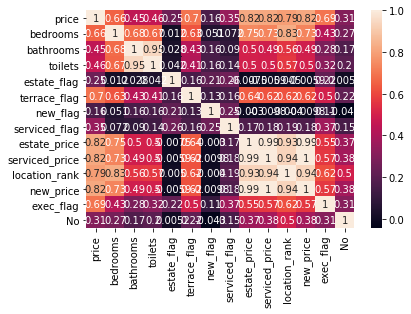

In [46]:
sns.heatmap (core, xticklabels = core.columns , yticklabels = core.columns, annot = True)

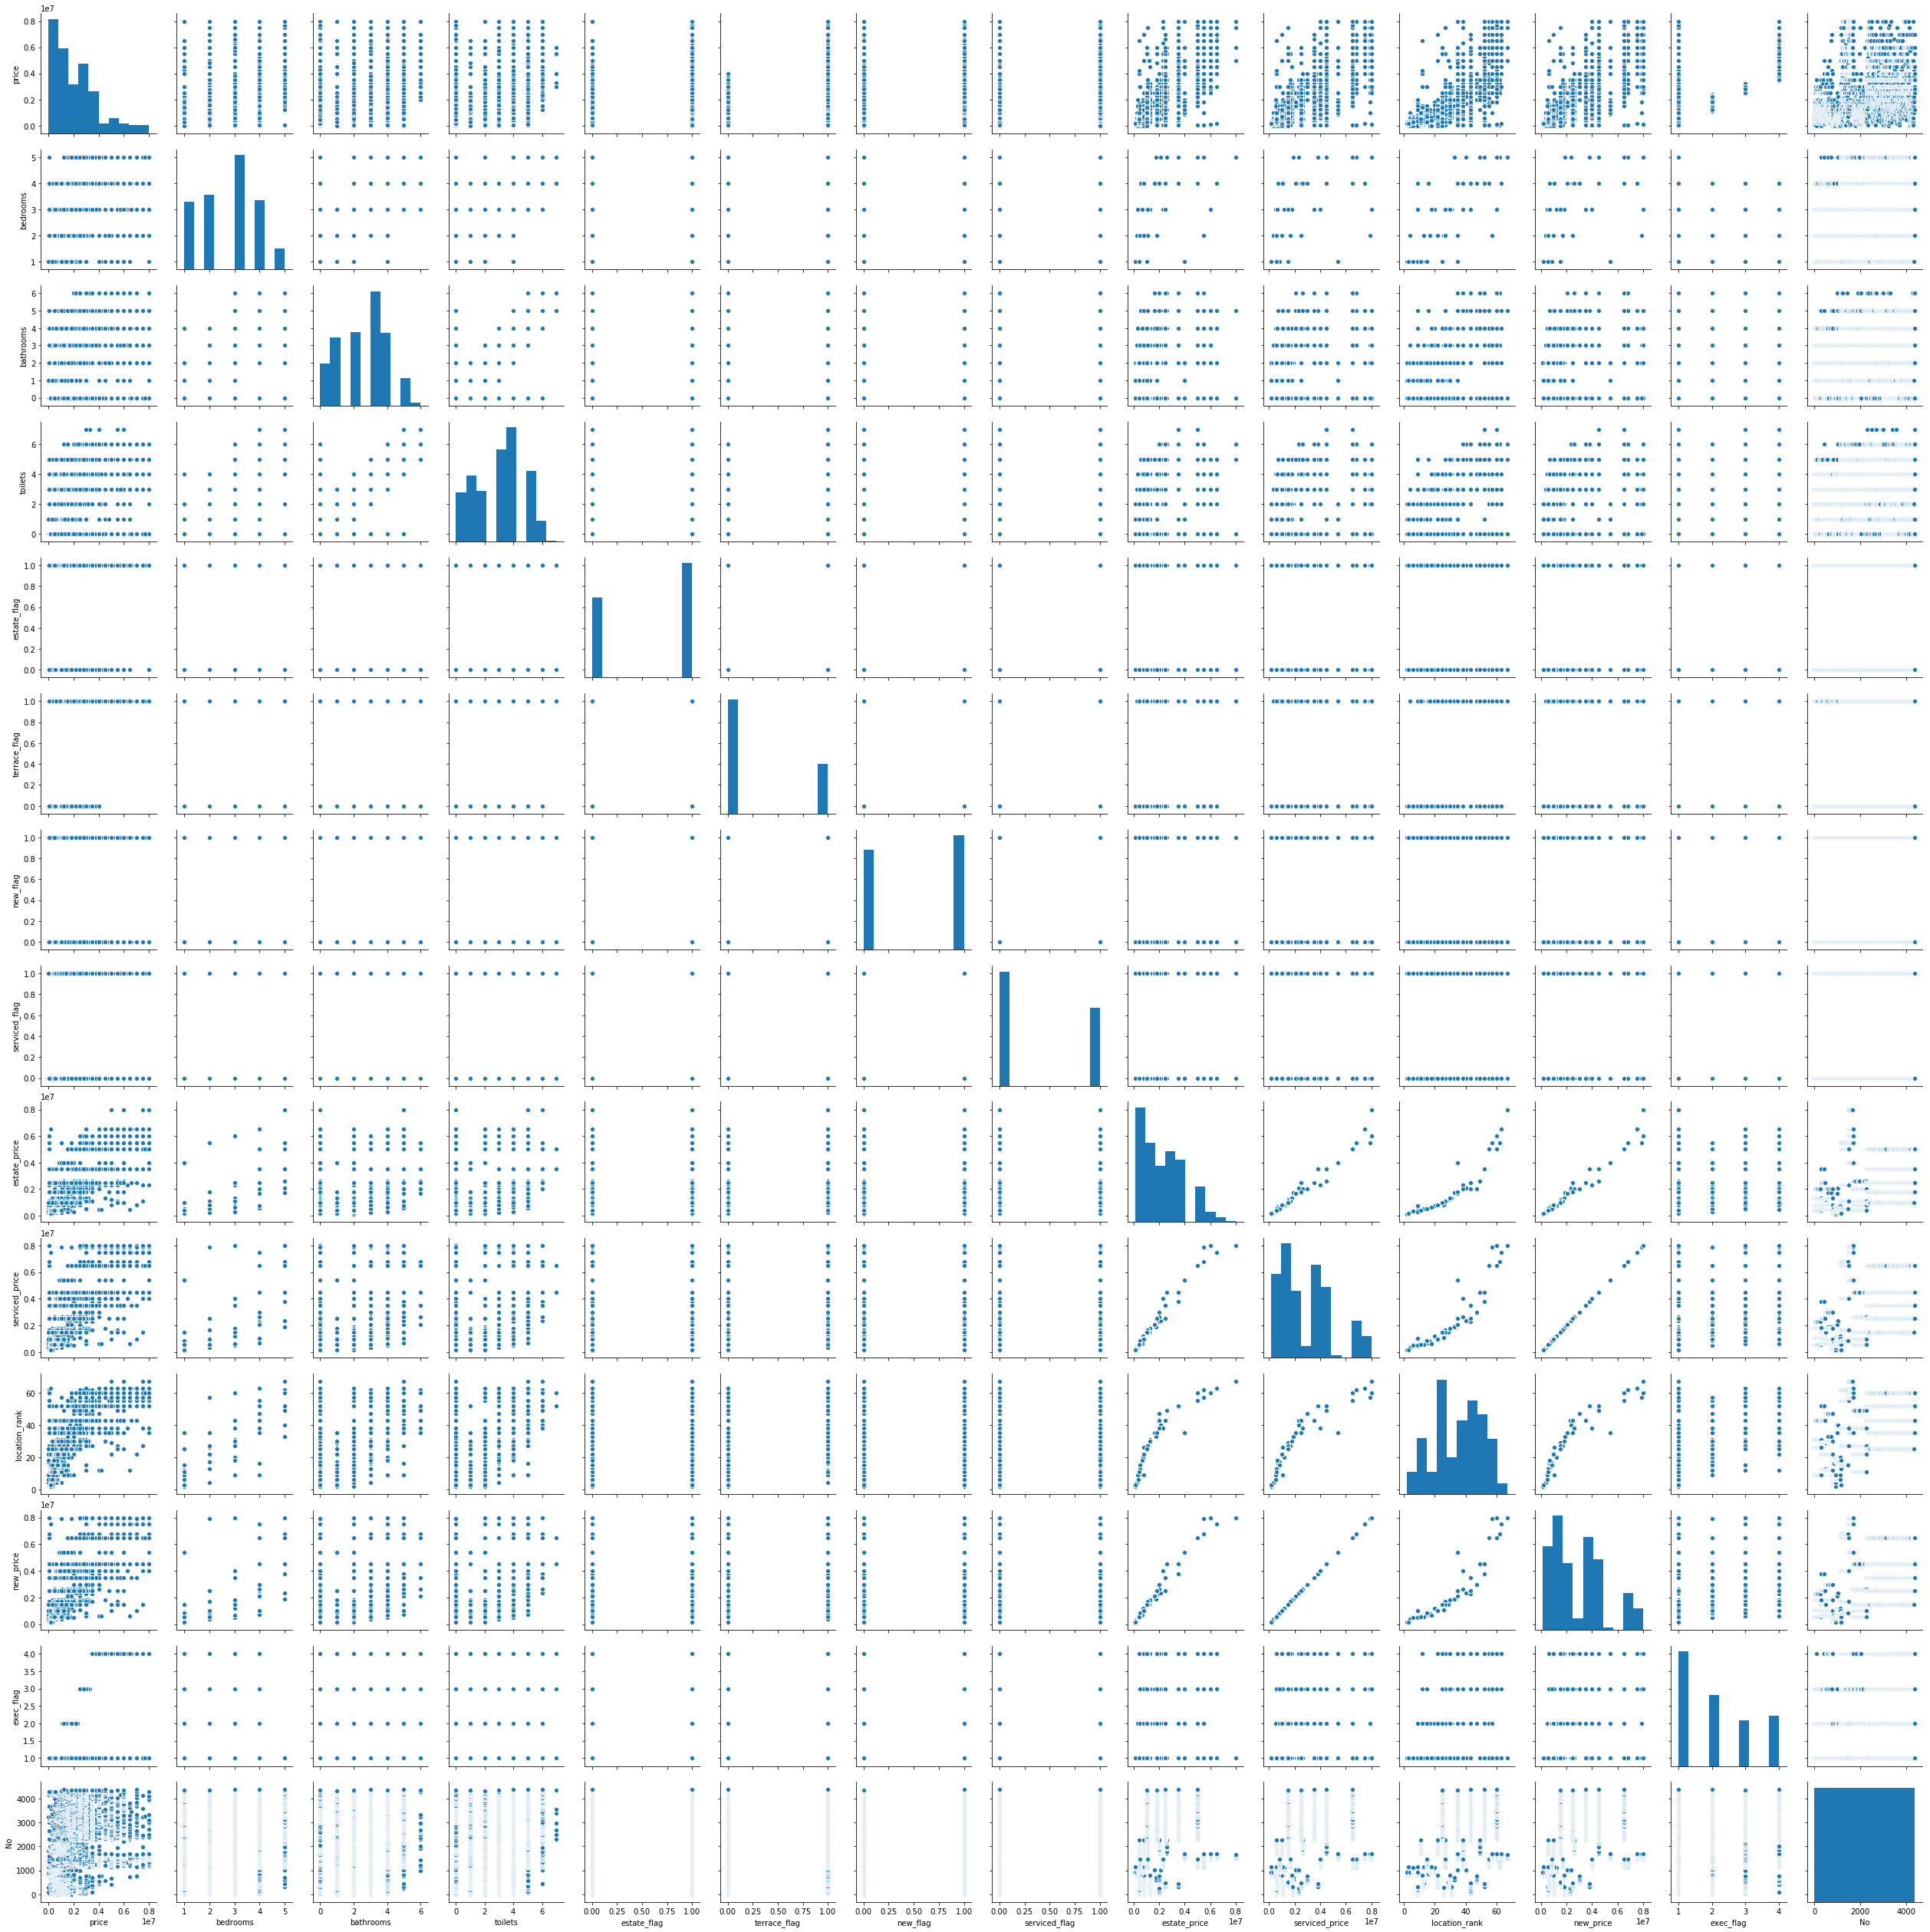

In [47]:
sns.pairplot (df)

Based on the above y become the price and we drop description as it does not add value in our data since all the entries have a unique value hence it does not add value in our predicting, modelling and analysis.

#### <font color = blue /> 1.1 Most preferred no of bedrooms:

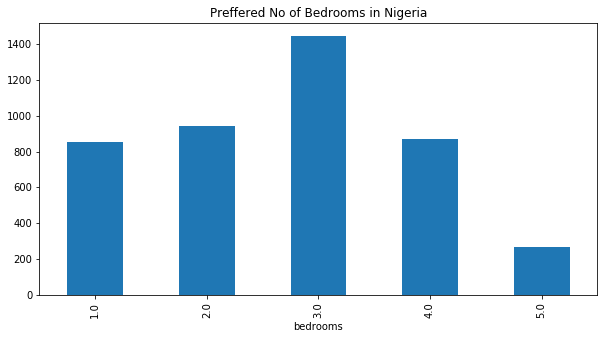

In [67]:
df1.groupby('bedrooms')['No'].count().plot.bar(figsize =(10,5), title ="Preffered No of Bedrooms in Nigeria")

#### <font color = blue />1.2 Most preffered no of bathrooms:

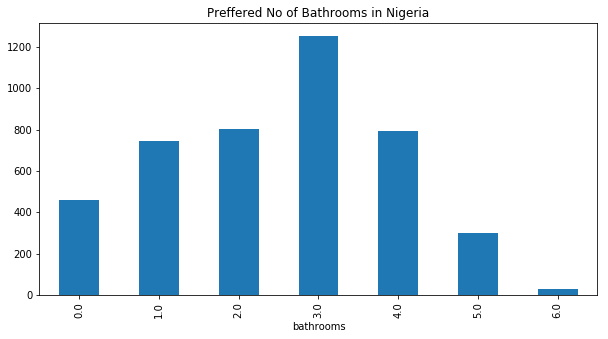

In [55]:
df1.groupby('bathrooms')['No'].count().plot.bar(figsize =(10,5), title ="Preffered No of Bathrooms in Nigeria")

#### <font color = blue />1.3 Most preferred Location:

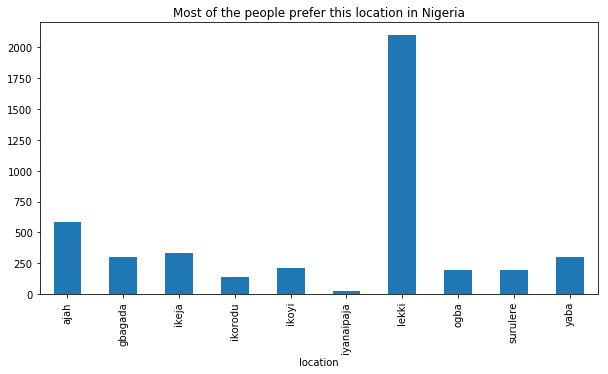

In [68]:
df1.groupby('location')['No'].count().plot.bar(figsize =(10,5),
                                              title ="Most of the people prefer this location in Nigeria");

#### <font color = blue />1.4 Executive flag vs Not executive flag:

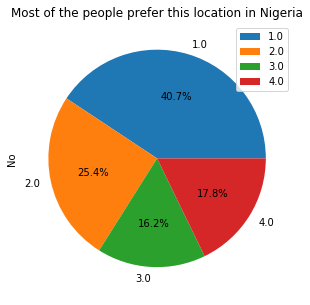

In [69]:
df1.groupby('exec_flag')['No'].count().plot.pie(figsize =(10,5),legend = True, autopct='%.1f%%',
                                               title ="Most of the people prefer this location in Nigeria");


#### <font color = blue />1.5 Prefered Location Rank:

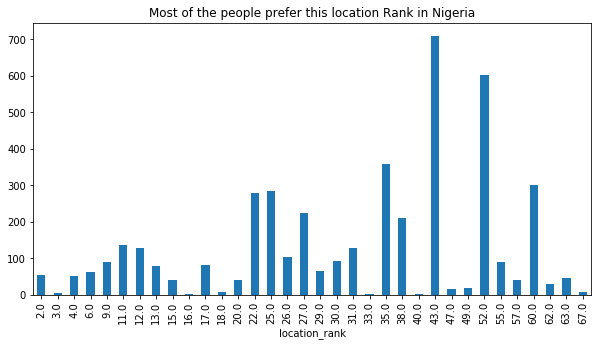

In [73]:
df1.groupby('location_rank')['No'].count().plot.bar(figsize =(10,5),
                                               title ="Most of the people prefer this location Rank in Nigeria");